In [55]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
from PIL import Image
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance

(685, 913, 3)

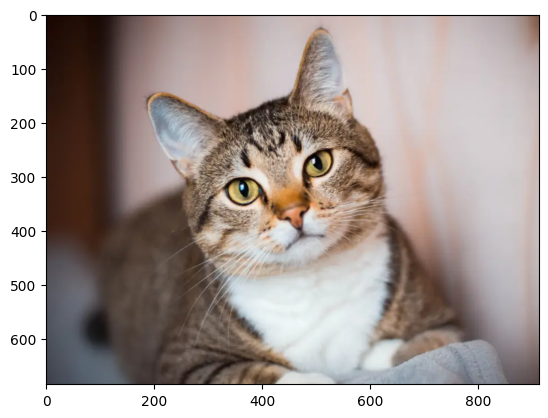

In [28]:
image = imread(os.path.join("/kaggle/input/gatuuuuu/gatocomuneuropeo.jpg"))
plt.imshow(image);
image.shape

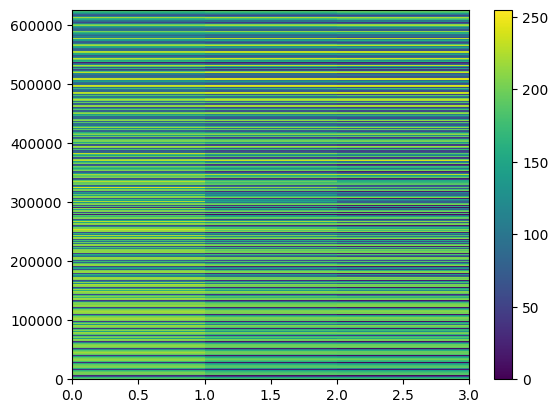

In [34]:
X = image.reshape(-1,3)
plt.pcolormesh(X)
plt.colorbar();

Agregar otras dos dimensiones (HxWx5)

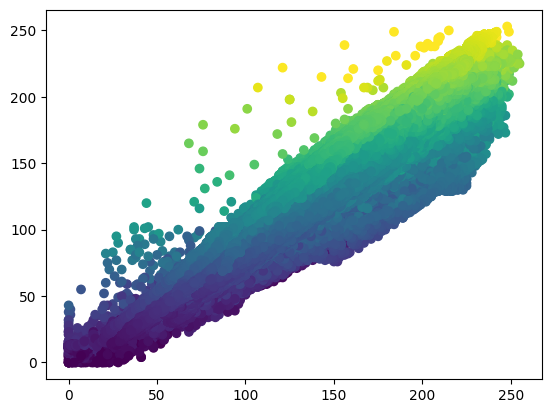

In [16]:
plt.scatter(X[:,0], X[:,1], c = X[:,2])
plt.show()

In [35]:
r = 685
c = 913
vr = np.linspace(0,r,r,endpoint=False)
vc = np.linspace(0,c,c,endpoint=False)
xc = np.kron(np.ones((r,1)),vc.reshape(-1,1))
xr = np.kron(vr.reshape(-1,1),np.ones((1,c)))
xc = xc.reshape(-1)
xr = xr.reshape(-1)
x = np.c_[X,xc,xr]
x.shape

(625405, 5)

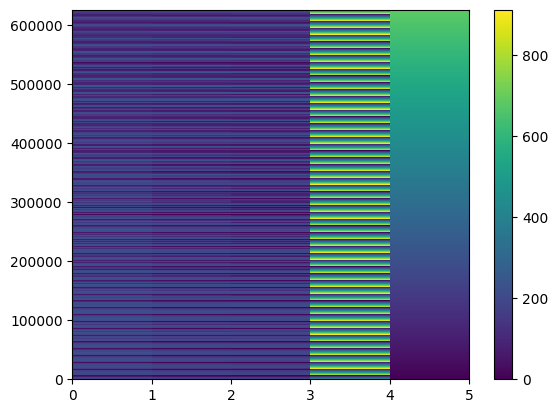

In [36]:
plt.pcolormesh(x)
plt.colorbar();

Se normaliza 

In [48]:
scaler = MinMaxScaler()
x_norm= scaler.fit_transform(x)

In [58]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x_norm)
y_predic = kmeans.predict(x_norm)
centroids = kmeans.cluster_centers_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
centroids.shape

(4, 5)

In [60]:
dis_centroids=distance.cdist(x_norm,centroids, 'euclidean')
dis_centroids.shape

(625405, 4)

In [63]:
dis_min = np.argmin(dis_centroids, axis=0)

In [72]:
image_color = x_norm[dis_min,:3]
image_color

array([[0.77254902, 0.72727273, 0.70196078],
       [0.70980392, 0.72727273, 0.74509804],
       [0.38431373, 0.3201581 , 0.28627451],
       [0.25098039, 0.17786561, 0.15686275]])

In [76]:
X_reconst = image_color[y_predic]
X_reconst = X_reconst.reshape(image.shape)

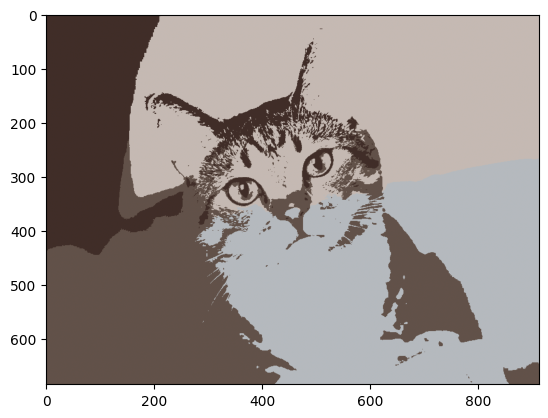

In [77]:
plt.imshow(X_reconst)

# 2. Reducción de dimensión

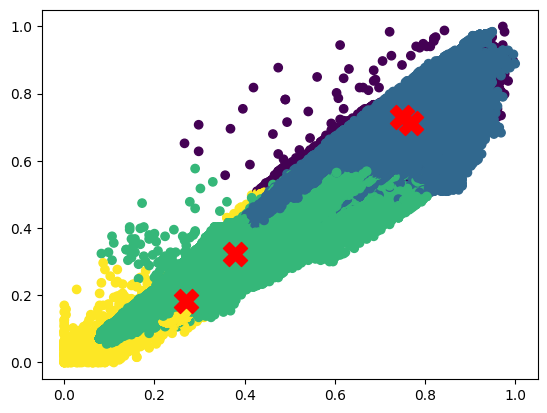

In [78]:
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=y_predic, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
plt.show()